# Loss and Metrics: An analysis of the relation between loss function and metrics for learning to rank

Yifan Song and Yufan Tang, for the midterm report of our project, we hope to use a juypyter notebook to show the process of our work more clearly.

## Introduction

When evaluating IR ranking models and loss functions, we have some common metrics including MRR, NDCG, DCG and etc, which focus on different aspects of the ranking results. Correspondingly, we have some common loss functions including pointwise, pairwise and listwise, which also focus on different aspects of the ranking results. In this project, we hope to the relation between loss function and metrics for the learning to rank task.

In our project, we hope to run allRank with pre-implemented loss function and metrics first, then we hope to apply some statistical methods to analyze the relation between loss function and metrics.

## Experiment Setup

We set up and run the [allRank](https://github.com/allegro/allRank/) and have run the experiments on the following datasets: mq-2008 and web10 till now.

The following setup combinations have been finished till the midterm:
- Network:
    - Full connected
- Loss:
    - Approx NDCG
    - MSE
    - Neural NDCG
    - Ranknet
- Metric
    - NDCG
        - 5, 10, 30, 60

A sample config json is attached as appendix.

## Experiment Results and Analysis

We did simple analysis and plot to show the result of different loss on mq2008 with different metrics.

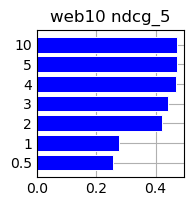

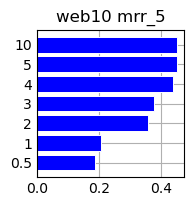

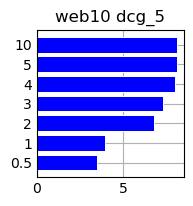

In [1]:
import analyzer
analy = analyzer.ExpAnalyzer() # load all experiments results
for metric in analy.metrics:
    analy.plot_bar_chart(dataset='web10', metric_name=metric)

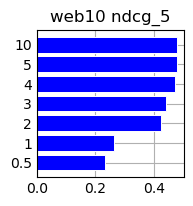

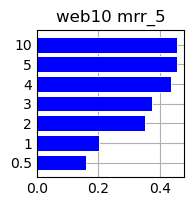

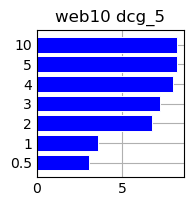

In [2]:
import analyzer
analy = analyzer.ExpAnalyzer() # load all experiments results
for metric in analy.metrics:
    analy.plot_bar_chart(dataset='web10', metric_name=metric)

In [3]:
import cv2
import numpy as np

# Load the 3 images
img1 = cv2.imread('imgs/web10_ndcg_5.png')
img2 = cv2.imread('imgs/web10_dcg_5.png')
img3 = cv2.imread('imgs/web10_mrr_5.png')

# Check the size and shape of each image
print(img1.size)
print(img2.size)
print(img3.size)

# Concatenate the 3 images horizontally
concatenated_img = np.hstack((img1, img2, img3))

# Save the concatenated image
cv2.imwrite('imgs/concatenated.png', concatenated_img)


119274
119274
119274


True

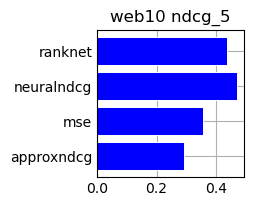

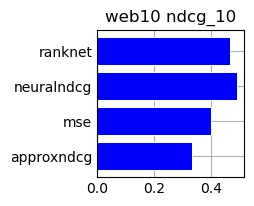

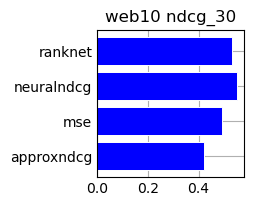

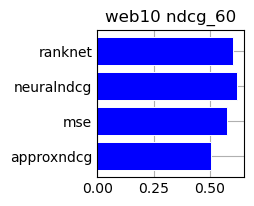

In [2]:
for metric in analy.metrics:
    analy.plot_bar_chart(dataset='web10', metric_name=metric)

## Simple Result

From these plots, we can easily find that neuralndcg is dominating our scoreboards in the metrics of NDCG, while ranknet shows a better performance in MQ2008 than in Web10 dataset on NDCG. We might hope to see similar pattern that different loss functions will show their strength in different datasets and metrics and analyze the reason behind it.

## Appendix

### Experiment Config Json

The following is a sample config json for the approxNDCGLoss and NDCG@5, 10, 30, 60 metrics.

In [3]:
import json
user_config = json.loads(
"""
{
    "model": {
        "fc_model": {
            "sizes": [
                96
            ],
            "input_norm": false,
            "activation": null,
            "dropout": 0.0
        },
        "transformer": {
            "N": 2,
            "d_ff": 384,
            "h": 1,
            "positional_encoding": null,
            "dropout": 0.1
        },
        "post_model": {
            "output_activation": "Tanh",
            "d_output": 1
        }
    },
    "data": {
        "path": "",
        "validation_ds_role": "test",
        "num_workers": 1,
        "batch_size": 64,
        "slate_length": 240
    },
    "optimizer": {
        "name": "Adam",
        "args": {
            "lr": 0.001
        }
    },
    "lr_scheduler": {
        "name": "StepLR",
        "args": {
            "step_size": 50,
            "gamma": 0.1
        }
    },
    "training": {
        "epochs": 100,
        "early_stopping_patience": 100,
        "gradient_clipping_norm": null
    },
    "val_metric": "ndcg_5",
    "metrics": [
        "ndcg_5",
        "ndcg_10",
        "ndcg_30",
        "ndcg_60"
    ],
    "loss": {
        "name": "approxNDCGLoss",
        "args": {
            "alpha": 1.0
        }
    },
    "detect_anomaly": false,
    "expected_metrics": {
        "val": {
            "ndcg_5": 0.5
        }
    }
}
""")